In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

In [70]:
df = pd.read_csv('../../Data/DATOS_LIMPIOS/delitos_sexuales.csv')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259481 entries, 0 to 259480
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DEPARTAMENTO  259481 non-null  object 
 1   MUNICIPIO     259481 non-null  object 
 2   CODIGO DANE   259481 non-null  float64
 3   ARMAS MEDIOS  259481 non-null  object 
 4   FECHA HECHO   259481 non-null  object 
 5   GENERO        259481 non-null  object 
 6   GRUPO ETARIO  259481 non-null  object 
 7   CANTIDAD      259481 non-null  int64  
 8   delito        259481 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 17.8+ MB


In [72]:
df['FECHA HECHO'] =  pd.to_datetime(df['FECHA HECHO'])
df = df.set_index('FECHA HECHO')
df = df.last('5Y')
df.head(2)

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,GENERO,GRUPO ETARIO,CANTIDAD,delito
FECHA HECHO,,,,,,,,
2018-01-01,ANTIOQUIA,MEDELLÍN (CT),5001000.0,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADULTOS,1,ARTÍCULO 206. ACTO SEXUAL VIOLENTO
2018-01-01,QUINDÍO,MONTENEGRO,63470000.0,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,MENORES,1,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS


In [73]:
top_departamentos = df['DEPARTAMENTO'].value_counts()[:5].index.tolist()
df = df.loc[df.DEPARTAMENTO.isin(top_departamentos)]
df = df.reset_index()
df = df[['FECHA HECHO', 'DEPARTAMENTO', 'CANTIDAD']]
df1 = df.groupby(['FECHA HECHO', 'DEPARTAMENTO']).sum().reset_index()
df1.head(2)

,FECHA HECHO,DEPARTAMENTO,CANTIDAD
0,2018-01-01,ANTIOQUIA,85
1,2018-01-01,ATLÁNTICO,12


In [74]:
departamentos = pd.read_csv('../../Data/poblacion_colombia_2018.csv', sep=',')
departamentos = departamentos.rename(columns={'departamento':'DEPARTAMENTO'})
departamentos['DEPARTAMENTO'] = departamentos['DEPARTAMENTO'].str.upper()
departamentos = departamentos.sort_values(by="población")
departamentos['DEPARTAMENTO'] = np.where(departamentos['DEPARTAMENTO'] == 'VALLE DEL CAUCA', 'VALLE', departamentos['DEPARTAMENTO'])
departamentos.head()

,DEPARTAMENTO,población
30,VAUPÉS,2985
31,VICHADA,20936
14,GUAINÍA,31514
20,NARIÑO,39293
0,AMAZONAS,48144


In [75]:
df2 = pd.merge(df1,departamentos,on='DEPARTAMENTO',how='left')
df2['población'] = df2['población'].astype(float)
df2['Proporcion'] = df2['CANTIDAD']/df2['población']*100
df2

,FECHA HECHO,DEPARTAMENTO,CANTIDAD,población,Proporcion
0,2018-01-01,ANTIOQUIA,85,2427129.0,0.003502
1,2018-01-01,ATLÁNTICO,12,1206319.0,0.000995
2,2018-01-01,CUNDINAMARCA,56,7412566.0,0.000755
3,2018-01-01,SANTANDER,38,58113.0,0.065390
4,2018-01-01,VALLE,22,2227642.0,0.000988
...,...,...,...,...,...
7774,2022-12-04,ANTIOQUIA,6,2427129.0,0.000247
7775,2022-12-04,ATLÁNTICO,2,1206319.0,0.000166
7776,2022-12-04,CUNDINAMARCA,7,7412566.0,0.000094
7777,2022-12-04,SANTANDER,2,58113.0,0.003442


In [76]:
dfs = []
departamentos = []
for i in df2.DEPARTAMENTO.unique():
    print(i)
    departamentos.append(i)
    dfs.append(df2.loc[df2.DEPARTAMENTO == i])
    
    

ANTIOQUIA
ATLÁNTICO
CUNDINAMARCA
SANTANDER
VALLE


/tmp/ipykernel_30301/3123434296.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


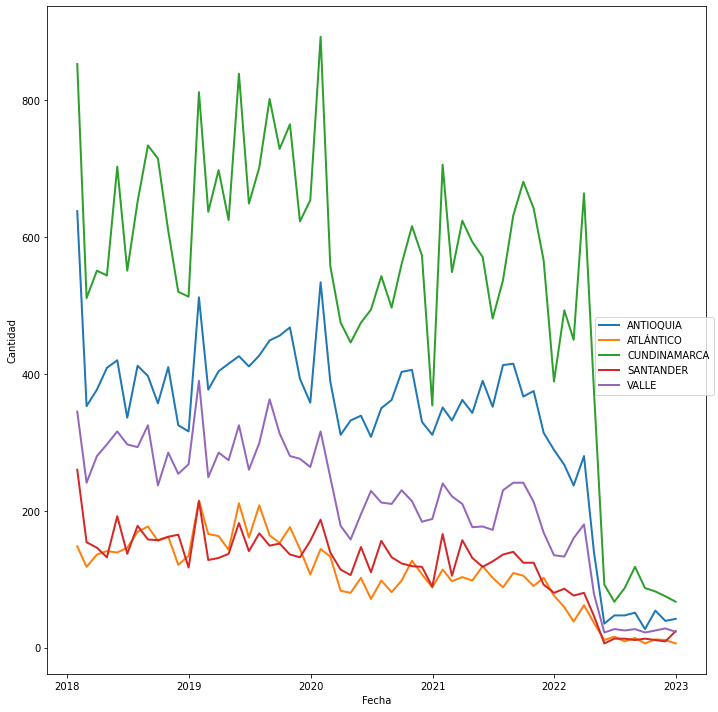

In [79]:
fig, ax = plt.subplots(1, figsize=(10,10))

count = 0

for df in dfs:
    df = df.set_index("FECHA HECHO").resample('M').sum().reset_index()
    ax.plot(df['FECHA HECHO'], df['CANTIDAD'],linewidth=2, label=departamentos[count])
    count += 1
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad')


fig.legend(labels=departamentos, loc="center right")
fig.tight_layout()
fig.show() 

/tmp/ipykernel_30301/1306016579.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


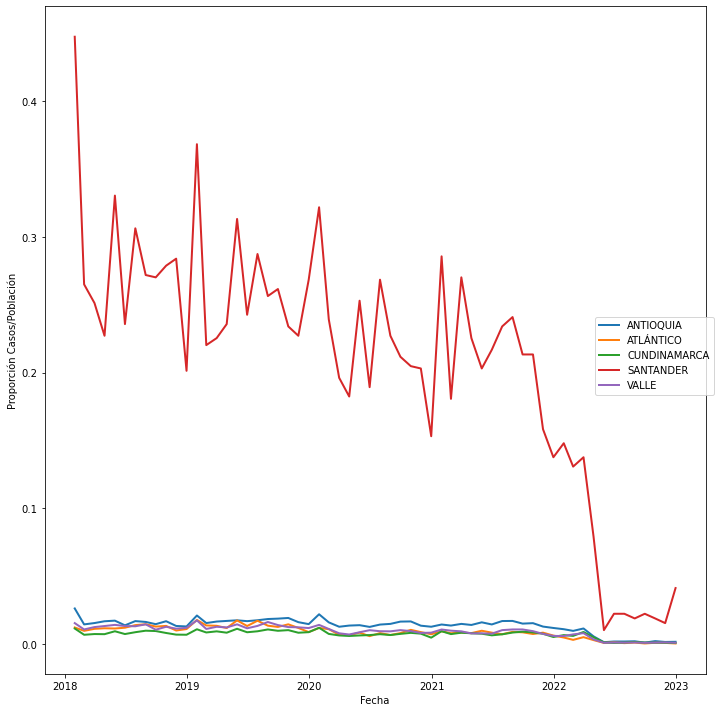

In [80]:
fig, ax = plt.subplots(1, figsize=(10,10))

count = 0

for df in dfs:
    df = df.set_index("FECHA HECHO").resample('M').sum().reset_index()
    ax.plot(df['FECHA HECHO'], df['Proporcion'],linewidth=2, label=departamentos[count])
    count += 1
    plt.xlabel('Fecha')
    plt.ylabel('Proporción Casos/Población')


fig.legend(labels=departamentos, loc="center right")
fig.tight_layout()
fig.show() 
